In [ ]:
# Medición del tiempo de inicio
import time

# Registrar el tiempo actual en el momento del inicio
inicio = time.time()

In [ ]:
# Basic packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
import matplotlib as mpl
import seaborn as sns
from pandas.plotting import scatter_matrix
from tabulate import tabulate
import datetime as dt

# Machine learning packages
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Reducción de dimensiones
from sklearn.decomposition import PCA

# Regresión lineal
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Métricas de rendimiento
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import bartlett

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Pretty print
from pprint import pprint

#SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Importar la clase MinMaxScaler de la biblioteca sklearn para realizar escalado en el rango [0, 1]
from sklearn.preprocessing import MinMaxScaler

# Importar la clase StandardScaler de la biblioteca sklearn para realizar escalamiento estándar
from sklearn.preprocessing import StandardScaler

# Importar la función tabulate del módulo tabulate para formatear tablas
from tabulate import tabulate

# Importar las clases y funciones necesarias de Keras para construir modelos de redes neuronales
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input, BatchNormalization, ReLU
from keras import Model

# Importar el módulo joblib para guardar y cargar objetos de Python
import joblib


# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', '.*do not.*', )

# Mostrar advertencia personalizada
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [ ]:
def TrainingSets(data, dataξ, step_back):
    """
    Genera conjuntos de entrenamiento para un modelo de predicción basado en series de tiempo.

    Parámetros:
    - data (array-like): Datos de la serie de tiempo principal.
    - dataξ (array-like): Datos de la serie de tiempo exógena.
    - step_back (int): Número de pasos hacia atrás en el tiempo para cada muestra de entrenamiento.

    Retorna:
    - X_train (array): Conjunto de características de entrenamiento.
    - ξ_train (array): Conjunto de valores objetivo de entrenamiento correspondientes.

    Descripción:
    Esta función toma dos series de tiempo y un parámetro step_back para generar conjuntos de entrenamiento.
    Cada muestra de entrenamiento en X_train consiste en una secuencia de step_back puntos en la serie de tiempo
    principal, mientras que el valor correspondiente en la serie de tiempo exógena se almacena en ξ_train.
    """

    train_data = data.copy()
    train_dataξ = dataξ.copy()

    # Conjuntos de entrenamiento
    X_train, ξ_train = [], []

    for i in range(len(train_data) - step_back - 1):
        a = train_data[i:(i + step_back)]
        X_train.append(a)
        ξ_train.append(train_dataξ[i + step_back])

    X_train = np.array(X_train)
    ξ_train = np.array(ξ_train)

    return X_train, ξ_train

In [ ]:
def TrainingSet(sequence, n_steps):
    """
		Parámetros:
        sequence (numpy.ndarray): La secuencia univariante que se va a dividir.
        n_steps (int): El número de pasos temporales a considerar para cada muestra.

    Retorna:
        numpy.ndarray: Matriz de muestras de entrada, cada una con n_pasos de tiempo.
        numpy.ndarray: Matriz de muestras de salida, cada una correspondiente al siguiente paso temporal.

    Descripción:
		Esta función toma una secuencia univariante y la divide en pares de entrada-salida
    adecuados para la previsión de series temporales. Crea muestras de entrada deslizando una ventana
    de tamaño n_pasos sobre la secuencia, y para cada ventana, extrae n_pasos de tiempo como entrada y el siguiente paso de tiempo como salida.
    como entrada y el siguiente paso temporal como salida.
    """
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

Carga Bases de Datos

In [ ]:
# Cargar datos de demanda energética comercial en Colombia desde Google Drive (acceso libre)

# Código de identificación del archivo en Google Drive
FILEID = "143FS8CtU4Wq1C6u43HMYyJC6QqktlZXM"  # Copiar el código desde el enlace generado en Google Drive

# Descargar el archivo utilizando wget y gestionar las cookies temporales
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Departamentos.zip && rm -rf /tmp/cookies.txt

# Descomprimir el archivo descargado en el directorio principal de Colab
!unzip Departamentos.zip

# Mostrar el contenido del directorio actual
!dir

--2023-08-06 16:06:05--  https://docs.google.com/uc?export=download&confirm=t&id=143FS8CtU4Wq1C6u43HMYyJC6QqktlZXM
Resolving docs.google.com (docs.google.com)... 173.194.212.100, 173.194.212.101, 173.194.212.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.212.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n4dt35efo5b0bkdiav580fhjvrr0hf49/1691337900000/15940467605774616319/*/143FS8CtU4Wq1C6u43HMYyJC6QqktlZXM?e=download&uuid=2064cccd-392b-4115-a821-573996d44e9b [following]
--2023-08-06 16:06:05--  https://doc-0o-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n4dt35efo5b0bkdiav580fhjvrr0hf49/1691337900000/15940467605774616319/*/143FS8CtU4Wq1C6u43HMYyJC6QqktlZXM?e=download&uuid=2064cccd-392b-4115-a821-573996d44e9b
Resolving doc-0o-6k-docs.googleusercontent.com (doc-0o-6k-docs.googleusercontent.com)... 173.194.217.

In [ ]:
# Leer un archivo Excel y cargar los datos en un DataFrame 'df1'
df1=pd.read_excel('/content/Colombia_Demanda_Horaria.xlsx')

In [ ]:
# Cargar datos de demanda energética comercial en Colombia desde Google Drive (acceso libre)

# Código de identificación del archivo en Google Drive
FILEID = "1rOOEKQEFaA2SxrCFzr-jyJbDWkWbRcbe"  # Copiar el código desde el enlace generado en Google Drive

# Descargar el archivo utilizando wget y gestionar las cookies temporales
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Modelos_ASO.zip && rm -rf /tmp/cookies.txt

# Descomprimir el archivo descargado en el directorio principal de Colab
!unzip Modelos_ASO.zip

# Mostrar el contenido del directorio actual
!dir

--2023-08-06 16:06:37--  https://docs.google.com/uc?export=download&confirm=&id=1rOOEKQEFaA2SxrCFzr-jyJbDWkWbRcbe
Resolving docs.google.com (docs.google.com)... 173.194.212.138, 173.194.212.100, 173.194.212.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.212.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k1028nf3ed1hts7osooplr5o9ghkr7j8/1691337975000/15940467605774616319/*/1rOOEKQEFaA2SxrCFzr-jyJbDWkWbRcbe?e=download&uuid=a0b90547-87bc-4dcc-aca7-c88aede1c920 [following]
--2023-08-06 16:06:37--  https://doc-0s-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k1028nf3ed1hts7osooplr5o9ghkr7j8/1691337975000/15940467605774616319/*/1rOOEKQEFaA2SxrCFzr-jyJbDWkWbRcbe?e=download&uuid=a0b90547-87bc-4dcc-aca7-c88aede1c920
Resolving doc-0s-6k-docs.googleusercontent.com (doc-0s-6k-docs.googleusercontent.com)... 173.194.217.1

In [ ]:
# Especifica la ruta y el nombre de archivo del archivo joblib que deseas cargar
ruta_archivo_joblib = '/content/modelo_svr_U_30.joblib'

try:
    # Carga el archivo joblib utilizando la función load
    model = joblib.load(ruta_archivo_joblib)
    print("Archivo joblib cargado exitosamente.")
    # Aquí puedes trabajar con los datos cargados, ya sea un modelo entrenado, objetos, etc.
except FileNotFoundError:
    print(f"El archivo {ruta_archivo_joblib} no fue encontrado.")
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo joblib: {e}")

Archivo joblib cargado exitosamente.


In [ ]:
# Eliminar la columna 'Date' del DataFrame 'df1'
df1 = df1.drop('Date', axis=1)

# Generar un rango de fechas desde '2000-01-01' hasta '2023-01-01' con una frecuencia horaria ('H')
date_rng = pd.date_range(start='2000-01-01', end='2023-01-01', freq='H')

# Establecer el índice del DataFrame 'df1' utilizando las fechas generadas
df1.set_index(date_rng[0:-1], inplace=True)

# Seleccionar una porción de la serie de tiempo utilizando indexación por fecha
Ts1 = df1['2020-10-01':'2022-12-31'].values

# Imprimir el tamaño de la serie horaria seleccionada
print('Tamaño Serie Horaria: ', len(Ts1))

# Inicializar un objeto de la clase MinMaxScaler para el escalado
scaler = MinMaxScaler()

# Ajustar el escalador a los datos en 'Ts1'
scaler.fit(Ts1)

# Aplicar el escalado a los datos en 'Ts1'
Ts1 = scaler.transform(Ts1)

Tamaño Serie Horaria:  19728


# TS= 30

In [ ]:
# Definir el tamaño de Time_step/step_back/window
step_back = 30

# Particionar X, Y y definir ventanas de tiempo (Time_step)
X1, Y1 = TrainingSet(Ts1, step_back)

# Definir el porcentaje de partición Train/Test
Part = 0.8

# Particionar la serie de tiempo en Train y Test
X_test1 = X1[int(len(X1) * Part):]
X_train1 = X1[:int(len(X1) * Part)]
X_test1 = X_test1.reshape(len(X_test1), step_back)
X_train1 = X_train1.reshape(len(X_train1), step_back)

# Particionar la serie de valores de salida en Train y Test
Y_test1 = Y1[int(len(Y1) * Part):]
Y_train1 = Y1[:int(len(Y1) * Part)]
Y_test1 = Y_test1.reshape(len(Y_test1), 1)
Y_train1 = Y_train1.reshape(len(Y_train1), 1)

In [ ]:
# Imprimir los tamaños de los conjuntos de entrenamiento y prueba

# Imprimir el tamaño de X_train y Y_train
print('Tamaño X_train1:', X_train1.shape, 'Tamaño Y_train1:', Y_train1.shape)

# Imprimir el tamaño de X_test y Y_test
print('Tamaño X_test1:', X_test1.shape, 'Tamaño Y_test1:', Y_test1.shape)

# Imprimir una línea de separación
print('-----------------------------------------------------------------------')

Tamaño X_train1:  (15758, 30) Tamaño Y_train1:  (15758, 1)
Tamaño X_test1:  (3940, 30) Tamaño Y_test1:  (3940, 1)
-----------------------------------------------------------------------


In [ ]:
# Realizar predicciones utilizando el modelo en el conjunto de prueba
y_predict = model.predict(X_test1)

# Imprimir el tipo de objeto 'model'
print(type(model))

sklearn.svm._classes.SVR

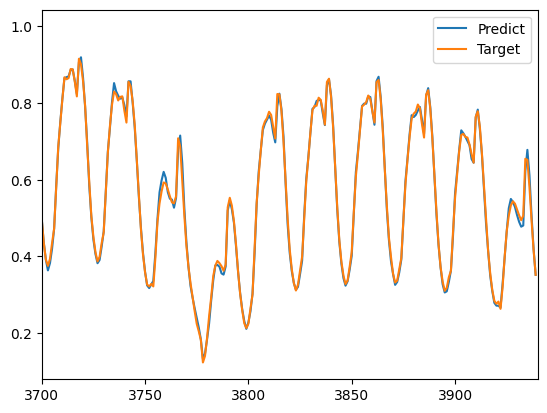

In [ ]:
# Graficar las predicciones y los valores reales en el conjunto de prueba

# Grafica las predicciones
plt.plot(y_predict, label='Predict')

# Grafica los valores reales
plt.plot(Y_test1, label='Target')

# Establece los límites del eje x en el gráfico
plt.xlim(3700, len(Y_test1))

# Agrega leyendas al gráfico
plt.legend()

# Muestra el gráfico
plt.show()

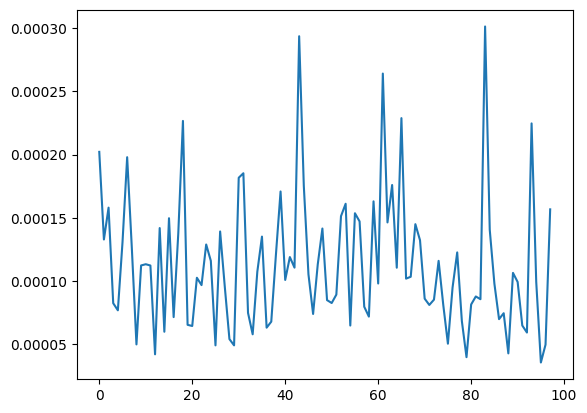

In [ ]:
series1 = Y_test1.copy()
series2 = y_predict.copy()

# Calcular la cantidad total de muestras
total_samples = len(series1)

# Definir el tamaño de los grupos para calcular el MSE por grupos
group_size = 40

# Calcular la cantidad total de grupos
num_groups = total_samples // group_size

# Redimensionar las series de tiempo dividiéndolas en grupos de 'group_size' muestras
series1_groups = np.array_split(series1, num_groups)
series2_groups = np.array_split(series2, num_groups)

# Calcular el MSE por grupos utilizando la función mean_squared_error
mse_by_groups = [mean_squared_error(s1, s2) for s1, s2 in zip(series1_groups, series2_groups)]

# Graficar los valores de MSE por grupo
plt.plot(mse_by_groups)
plt.xlabel('Grupos')
plt.ylabel('MSE')
plt.title('MSE por Grupos')
plt.show()

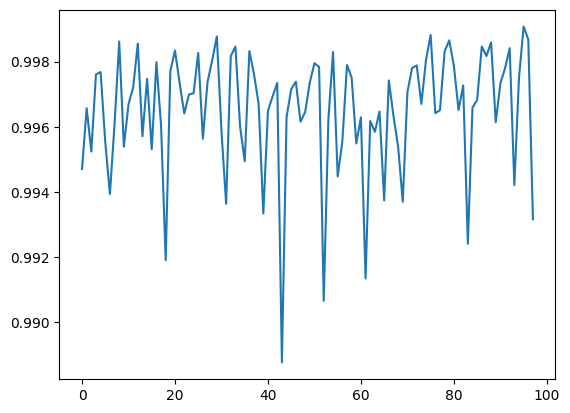

In [ ]:
series1 = Y_test1.copy()
series2 = y_predict.copy()

# Calcular la cantidad total de muestras
total_samples = len(series1)

# Definir el tamaño de los grupos para calcular el R2 por grupos
group_size = 40

# Calcular la cantidad total de grupos
num_groups = total_samples // group_size

# Redimensionar las series de tiempo dividiéndolas en grupos de 'group_size' muestras
series1_groups = np.array_split(series1, num_groups)
series2_groups = np.array_split(series2, num_groups)

# Calcular el R2 por grupos utilizando la función r2_score
r2_by_groups = [r2_score(s2, s1) for s1, s2 in zip(series1_groups, series2_groups)]

# Graficar los valores de R2 por grupo
plt.plot(r2_by_groups)
plt.xlabel('Grupos')
plt.ylabel('R2')
plt.title('R2 por Grupos')
plt.show()

In [ ]:
def FcnMAPE(S1, S2):
    """
    Parámetros:
        S1 (array-like): Serie de tiempo 1.
        S2 (array-like): Serie de tiempo 2.

    Retorna:
        float: Complemento de Symmetric Mean Absolute Percentage Error (cnSMAPE).

    Descripción:
        Calcula el Complemento de Symmetric Mean Absolute Percentage Error (cnSMAPE) entre dos series de tiempo.
    """
    mape = mean_absolute_percentage_error(S1, S2)  # Cálculo del MAPE
    smape = 2 * mape * 100 / (100 - mape)  # Cálculo del SMAPE
    cnSMAPE = round(1 - (smape / 2), 5)  # Cálculo del cnSMAPE
    return cnSMAPE

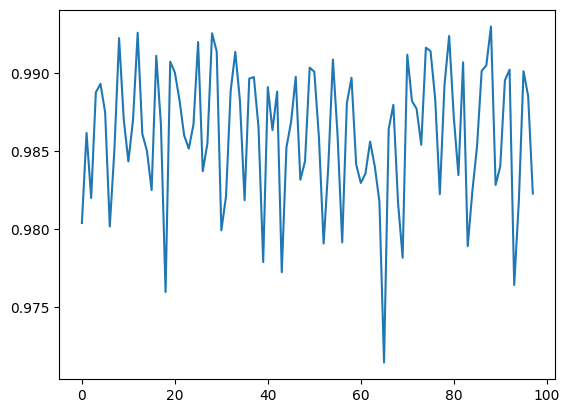

In [ ]:
series1 = Y_test1.copy()
series2 = y_predict.copy()

# Calcular la cantidad total de muestras
total_samples = len(series1)

# Definir el tamaño de los grupos para calcular el FcnMAPE por grupos
group_size = 40

# Calcular la cantidad total de grupos
num_groups = total_samples // group_size

# Redimensionar las series de tiempo dividiéndolas en grupos de 'group_size' muestras
series1_groups = np.array_split(series1, num_groups)
series2_groups = np.array_split(series2, num_groups)

# Calcular el FcnMAPE por grupos utilizando la función FcnMAPE
FcnMAPE_by_groups = [FcnMAPE(s2, s1) for s1, s2 in zip(series1_groups, series2_groups)]

# Graficar los valores de FcnMAPE por grupo
plt.plot(FcnMAPE_by_groups)
plt.xlabel('Grupos')
plt.ylabel('FcnMAPE')
plt.title('FcnMAPE por Grupos')
plt.show()

In [ ]:
# Supongamos que tienes las tres listas llamadas lista1, lista2 y lista3
lista1 = mse_by_groups.copy()
lista2 = r2_by_groups.copy()
lista3 = FcnMAPE_by_groups.copy()

# Crear un diccionario con las tres listas
data = {
    'MSE': lista1,
    'R2': lista2,
    'cnMAPE': lista3
}

# Crear un DataFrame utilizando el diccionario de datos
df = pd.DataFrame(data)

# Especificar el nombre del archivo de Excel para guardar el DataFrame
nombre_archivo = 'SVR_SCORE.xlsx'

# Guardar el DataFrame en un archivo de Excel, sin incluir el índice
df.to_excel(nombre_archivo, index=False)

# Imprimir un mensaje indicando que los datos han sido guardados en el archivo
print("Datos combinados guardados en el archivo:", nombre_archivo)

Datos combinados guardados en el archivo: SVR_SCORE.xlsx
